PROBLEM STATEMENT: PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [ ]:
# Importing reqd libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV, KFold
from keras.layers import Dropout


In [ ]:
from google.colab import files
uploaded=files.upload()


Saving forestfires.csv to forestfires (1).csv


In [ ]:
df=pd.read_csv("forestfires.csv")

EDA

In [ ]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
df.duplicated().any()

True

In [ ]:
df.duplicated().sum()

8

In [ ]:
df.shape

(517, 31)

In [ ]:
#Drop the duplicate values
df=df.drop_duplicates()

In [ ]:
df.shape

(509, 31)

8 Duplicated rows has been removed

In [ ]:
df.sample()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
188,mar,sat,90.8,41.9,89.4,7.9,13.3,42,0.9,0.0,...,0,0,0,0,1,0,0,0,0,large


In [ ]:
df=df.drop(['month','day'],axis=1)

(array([ 18.,  11.,  31.,  47.,  91., 122.,  98.,  54.,  24.,  13.]),
 array([ 2.2 ,  5.31,  8.42, 11.53, 14.64, 17.75, 20.86, 23.97, 27.08,
        30.19, 33.3 ]),
 <BarContainer object of 10 artists>)

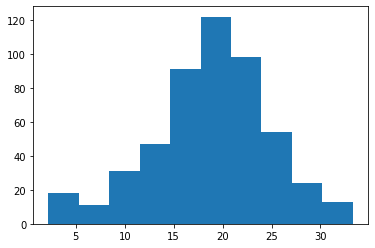

In [ ]:
# Visualizing the data
plt.hist(df['temp'])

In [ ]:
df['size_category'].value_counts()

small    371
large    138
Name: size_category, dtype: int64

In [ ]:
df.shape

(509, 29)

In [ ]:
X=df.drop('size_category',axis=1)

In [ ]:
y=df['size_category']

In [ ]:
#Standardization of data
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

Tuning of hyperparameters for the model

Batch size & Epochs

In [ ]:
def create_model():
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(20, input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(12,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100,150]
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

<ipython-input-49-ed8611264e5f>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END ....batch_size=10, epochs=10;, score=0.971 total time=   3.8s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................
[CV 2/5; 1/12] END ....batch_size=10, epochs=10;, score=0.863 total time=   2.6s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................
[CV 3/5; 1/12] END ....batch_size=10, epochs=10;, score=0.853 total time=   2.2s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................
[CV 4/5; 1/12] END ....batch_size=10, epochs=10;, score=0.873 total time=   2.7s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................
[CV 5/5; 1/12] END ....batch_size=10, epochs=10;, score=0.881 total time=   3.0s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................
[CV 1/5; 2/12] END ....batch_size=10, epochs=50;

[CV 4/5; 9/12] END ....batch_size=40, epochs=10;, score=0.794 total time=   1.8s
[CV 5/5; 9/12] START batch_size=40, epochs=10...................................


[CV 5/5; 9/12] END ....batch_size=40, epochs=10;, score=0.822 total time=   2.7s
[CV 1/5; 10/12] START batch_size=40, epochs=50..................................
[CV 1/5; 10/12] END ...batch_size=40, epochs=50;, score=1.000 total time=   2.6s
[CV 2/5; 10/12] START batch_size=40, epochs=50..................................
[CV 2/5; 10/12] END ...batch_size=40, epochs=50;, score=0.873 total time=   2.7s
[CV 3/5; 10/12] START batch_size=40, epochs=50..................................
[CV 3/5; 10/12] END ...batch_size=40, epochs=50;, score=0.902 total time=   2.6s
[CV 4/5; 10/12] START batch_size=40, epochs=50..................................
[CV 4/5; 10/12] END ...batch_size=40, epochs=50;, score=0.892 total time=   4.0s
[CV 5/5; 10/12] START batch_size=40, epochs=50..................................
[CV 5/5; 10/12] END ...batch_size=40, epochs=50;, score=0.871 total time=   2.6s
[CV 1/5; 11/12] START batch_size=40, epochs=100.................................
[CV 1/5; 11/12] END ..batch_

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.917433500289917, using {'batch_size': 40, 'epochs': 100}
0.8880023121833801,0.04236243554750816 with: {'batch_size': 10, 'epochs': 10}
0.9036691784858704,0.051810185987564296 with: {'batch_size': 10, 'epochs': 50}
0.9115317344665528,0.04486816597426062 with: {'batch_size': 10, 'epochs': 100}
0.9076295733451843,0.046722250944418973 with: {'batch_size': 10, 'epochs': 150}
0.8644146680831909,0.07112731338987197 with: {'batch_size': 20, 'epochs': 10}
0.8958260416984558,0.0536680495065283 with: {'batch_size': 20, 'epochs': 50}
0.9036885976791382,0.049862186819659225 with: {'batch_size': 20, 'epochs': 100}
0.8958260416984558,0.054379709427543846 with: {'batch_size': 20, 'epochs': 150}
0.8153368234634399,0.10136897269217955 with: {'batch_size': 40, 'epochs': 10}
0.9075907468795776,0.04765553570561898 with: {'batch_size': 40, 'epochs': 50}
0.917433500289917,0.04335414466940131 with: {'batch_size': 40, 'epochs': 100}
0.9155309677124024,0.04537637585416376 with: {'batch_size': 40, 'epoc

Tuning of Hyperparameters:- Learning rate and Drop out rate

In [ ]:
# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(20,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12,input_dim = 20,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)
# Define the grid search parameters
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
# Make a dictionary of the grid search parameters
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

<ipython-input-57-f350f5819502>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   5.3s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.804 total time=   5.1s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.853 total time=   4.8s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.873 total time=   4.9s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.891 total time=   5.5s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.919413709640503, using {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8841001629829407,0.06482983187197192 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9096292018890381,0.05089938966002678 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8526499748229981,0.04556822943673839 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8841001749038696,0.06210383137461515 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9115123271942138,0.047433752913884235 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.8212579965591431,0.13080967026890888 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.8821199655532836,0.06414061340465341 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.919413709640503,0.0375028427338749 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7838477969169617,0.1204722542958962 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


Tuning of Hyperparameters:- 

Activation Function and Kernel Initializer¶

In [ ]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(20,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(12,input_dim = 20,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
param_grids = dict(activation_function = activation_function,init = init)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

<ipython-input-62-060fc9f57426>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   8.1s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.765 total time=   7.7s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.510 total time=   4.5s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.676 total time=   5.3s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.693 total time=   4.4s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   4.2s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.765 total time=   5.2s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.510 total time=   4.2s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.676 total time=   4.1s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.693 total time=   5.1s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   6.6s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.765 total time=   6.7s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.510 total time=   7.0s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.676 total time=   5.3s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.693 total time=   5.4s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   6.7s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.843 total time=   6.7s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.853 total time=   5.2s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.882 total time=   4.3s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.891 total time=   4.2s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   4.9s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.833 total time=   4.0s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.843 total time=   6.3s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.853 total time=   4.4s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.911 total time=   4.4s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   5.5s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.765 total time=   6.8s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.510 total time=   5.2s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.676 total time=   4.2s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.693 total time=   4.1s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   5.2s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.951 total time=   4.1s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.912 total time=   4.7s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.941 total time=   7.0s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.931 total time=   6.4s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   6.9s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.922 total time=   6.7s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.912 total time=   4.4s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.941 total time=   5.0s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.950 total time=   7.2s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   4.4s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.765 total time=   5.1s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.510 total time=   6.5s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.676 total time=   4.9s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.693 total time=   4.1s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   7.8s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.961 total time=   6.9s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.922 total time=   6.8s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.941 total time=   6.8s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.941 total time=   5.3s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   6.6s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.922 total time=   6.7s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.912 total time=   4.4s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.931 total time=   6.6s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.950 total time=   4.1s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   4.0s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.765 total time=   5.0s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.510 total time=   7.9s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.676 total time=   5.6s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.693 total time=   4.4s


In [ ]:
# Finding the best parametrs
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9528246998786927, using {'activation_function': 'linear', 'init': 'uniform'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8939040899276733,0.05595163602984724 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8880605697631836,0.062126031727092385 with: {'activation_function': 'relu', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'relu', 'init': 'zero'}
0.9469229221343994,0.029550533168896966 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.945000970363617,0.03073574623718422 with: {'activation_function': 'tanh', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9528246998786927,0.026649861162605665 with: {'activation_fun

Tuning of Hyperparameter :-

Number of Neurons in activation layer

In [ ]:


def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)
neuron1 = [4,8,16,20]
neuron2 = [2,4,8,12]
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

<ipython-input-65-d97fbb668335>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START neuron1=4, neuron2=2.......................................


[CV 1/5; 1/16] END ........neuron1=4, neuron2=2;, score=0.990 total time=   4.2s
[CV 2/5; 1/16] START neuron1=4, neuron2=2.......................................


[CV 2/5; 1/16] END ........neuron1=4, neuron2=2;, score=0.765 total time=   3.5s
[CV 3/5; 1/16] START neuron1=4, neuron2=2.......................................


[CV 3/5; 1/16] END ........neuron1=4, neuron2=2;, score=0.676 total time=   3.0s
[CV 4/5; 1/16] START neuron1=4, neuron2=2.......................................


[CV 4/5; 1/16] END ........neuron1=4, neuron2=2;, score=0.706 total time=   2.8s
[CV 5/5; 1/16] START neuron1=4, neuron2=2.......................................


[CV 5/5; 1/16] END ........neuron1=4, neuron2=2;, score=0.762 total time=   2.7s
[CV 1/5; 2/16] START neuron1=4, neuron2=4.......................................


[CV 1/5; 2/16] END ........neuron1=4, neuron2=4;, score=0.990 total time=   4.1s
[CV 2/5; 2/16] START neuron1=4, neuron2=4.......................................


[CV 2/5; 2/16] END ........neuron1=4, neuron2=4;, score=0.765 total time=   2.6s
[CV 3/5; 2/16] START neuron1=4, neuron2=4.......................................


[CV 3/5; 2/16] END ........neuron1=4, neuron2=4;, score=0.696 total time=   2.7s
[CV 4/5; 2/16] START neuron1=4, neuron2=4.......................................


[CV 4/5; 2/16] END ........neuron1=4, neuron2=4;, score=0.735 total time=   5.6s
[CV 5/5; 2/16] START neuron1=4, neuron2=4.......................................


[CV 5/5; 2/16] END ........neuron1=4, neuron2=4;, score=0.772 total time=   4.8s
[CV 1/5; 3/16] START neuron1=4, neuron2=8.......................................


[CV 1/5; 3/16] END ........neuron1=4, neuron2=8;, score=0.990 total time=   4.2s
[CV 2/5; 3/16] START neuron1=4, neuron2=8.......................................


[CV 2/5; 3/16] END ........neuron1=4, neuron2=8;, score=0.765 total time=   3.4s
[CV 3/5; 3/16] START neuron1=4, neuron2=8.......................................


[CV 3/5; 3/16] END ........neuron1=4, neuron2=8;, score=0.706 total time=   4.5s
[CV 4/5; 3/16] START neuron1=4, neuron2=8.......................................


[CV 4/5; 3/16] END ........neuron1=4, neuron2=8;, score=0.794 total time=   4.1s
[CV 5/5; 3/16] START neuron1=4, neuron2=8.......................................


[CV 5/5; 3/16] END ........neuron1=4, neuron2=8;, score=0.822 total time=   3.3s
[CV 1/5; 4/16] START neuron1=4, neuron2=12......................................


[CV 1/5; 4/16] END .......neuron1=4, neuron2=12;, score=0.990 total time=   4.5s
[CV 2/5; 4/16] START neuron1=4, neuron2=12......................................


[CV 2/5; 4/16] END .......neuron1=4, neuron2=12;, score=0.765 total time=   4.0s
[CV 3/5; 4/16] START neuron1=4, neuron2=12......................................


[CV 3/5; 4/16] END .......neuron1=4, neuron2=12;, score=0.775 total time=   4.1s
[CV 4/5; 4/16] START neuron1=4, neuron2=12......................................


[CV 4/5; 4/16] END .......neuron1=4, neuron2=12;, score=0.804 total time=   3.3s
[CV 5/5; 4/16] START neuron1=4, neuron2=12......................................


[CV 5/5; 4/16] END .......neuron1=4, neuron2=12;, score=0.842 total time=   5.0s
[CV 1/5; 5/16] START neuron1=8, neuron2=2.......................................


[CV 1/5; 5/16] END ........neuron1=8, neuron2=2;, score=0.990 total time=   4.7s
[CV 2/5; 5/16] START neuron1=8, neuron2=2.......................................


[CV 2/5; 5/16] END ........neuron1=8, neuron2=2;, score=0.765 total time=   4.9s
[CV 3/5; 5/16] START neuron1=8, neuron2=2.......................................


[CV 3/5; 5/16] END ........neuron1=8, neuron2=2;, score=0.735 total time=   4.2s
[CV 4/5; 5/16] START neuron1=8, neuron2=2.......................................


[CV 4/5; 5/16] END ........neuron1=8, neuron2=2;, score=0.765 total time=   4.3s
[CV 5/5; 5/16] START neuron1=8, neuron2=2.......................................


[CV 5/5; 5/16] END ........neuron1=8, neuron2=2;, score=0.762 total time=   4.2s
[CV 1/5; 6/16] START neuron1=8, neuron2=4.......................................


[CV 1/5; 6/16] END ........neuron1=8, neuron2=4;, score=0.990 total time=   4.1s
[CV 2/5; 6/16] START neuron1=8, neuron2=4.......................................


[CV 2/5; 6/16] END ........neuron1=8, neuron2=4;, score=0.765 total time=   4.1s
[CV 3/5; 6/16] START neuron1=8, neuron2=4.......................................


[CV 3/5; 6/16] END ........neuron1=8, neuron2=4;, score=0.755 total time=   2.8s
[CV 4/5; 6/16] START neuron1=8, neuron2=4.......................................


[CV 4/5; 6/16] END ........neuron1=8, neuron2=4;, score=0.784 total time=   3.1s
[CV 5/5; 6/16] START neuron1=8, neuron2=4.......................................


[CV 5/5; 6/16] END ........neuron1=8, neuron2=4;, score=0.802 total time=   2.8s
[CV 1/5; 7/16] START neuron1=8, neuron2=8.......................................


[CV 1/5; 7/16] END ........neuron1=8, neuron2=8;, score=0.971 total time=   4.1s
[CV 2/5; 7/16] START neuron1=8, neuron2=8.......................................


[CV 2/5; 7/16] END ........neuron1=8, neuron2=8;, score=0.765 total time=   5.5s
[CV 3/5; 7/16] START neuron1=8, neuron2=8.......................................


[CV 3/5; 7/16] END ........neuron1=8, neuron2=8;, score=0.824 total time=   4.6s
[CV 4/5; 7/16] START neuron1=8, neuron2=8.......................................


[CV 4/5; 7/16] END ........neuron1=8, neuron2=8;, score=0.814 total time=   4.0s
[CV 5/5; 7/16] START neuron1=8, neuron2=8.......................................


[CV 5/5; 7/16] END ........neuron1=8, neuron2=8;, score=0.851 total time=   4.3s
[CV 1/5; 8/16] START neuron1=8, neuron2=12......................................


[CV 1/5; 8/16] END .......neuron1=8, neuron2=12;, score=0.990 total time=   2.9s
[CV 2/5; 8/16] START neuron1=8, neuron2=12......................................


[CV 2/5; 8/16] END .......neuron1=8, neuron2=12;, score=0.784 total time=   3.7s
[CV 3/5; 8/16] START neuron1=8, neuron2=12......................................


[CV 3/5; 8/16] END .......neuron1=8, neuron2=12;, score=0.814 total time=   2.8s
[CV 4/5; 8/16] START neuron1=8, neuron2=12......................................


[CV 4/5; 8/16] END .......neuron1=8, neuron2=12;, score=0.853 total time=   2.8s
[CV 5/5; 8/16] START neuron1=8, neuron2=12......................................


[CV 5/5; 8/16] END .......neuron1=8, neuron2=12;, score=0.861 total time=   4.1s
[CV 1/5; 9/16] START neuron1=16, neuron2=2......................................


[CV 1/5; 9/16] END .......neuron1=16, neuron2=2;, score=1.000 total time=   5.3s
[CV 2/5; 9/16] START neuron1=16, neuron2=2......................................


[CV 2/5; 9/16] END .......neuron1=16, neuron2=2;, score=0.765 total time=   4.0s
[CV 3/5; 9/16] START neuron1=16, neuron2=2......................................


[CV 3/5; 9/16] END .......neuron1=16, neuron2=2;, score=0.824 total time=   4.1s
[CV 4/5; 9/16] START neuron1=16, neuron2=2......................................


[CV 4/5; 9/16] END .......neuron1=16, neuron2=2;, score=0.804 total time=   5.7s
[CV 5/5; 9/16] START neuron1=16, neuron2=2......................................


[CV 5/5; 9/16] END .......neuron1=16, neuron2=2;, score=0.842 total time=   3.2s
[CV 1/5; 10/16] START neuron1=16, neuron2=4.....................................


[CV 1/5; 10/16] END ......neuron1=16, neuron2=4;, score=0.990 total time=   4.4s
[CV 2/5; 10/16] START neuron1=16, neuron2=4.....................................


[CV 2/5; 10/16] END ......neuron1=16, neuron2=4;, score=0.775 total time=   4.2s
[CV 3/5; 10/16] START neuron1=16, neuron2=4.....................................


[CV 3/5; 10/16] END ......neuron1=16, neuron2=4;, score=0.863 total time=   4.1s
[CV 4/5; 10/16] START neuron1=16, neuron2=4.....................................


[CV 4/5; 10/16] END ......neuron1=16, neuron2=4;, score=0.824 total time=   4.1s
[CV 5/5; 10/16] START neuron1=16, neuron2=4.....................................


[CV 5/5; 10/16] END ......neuron1=16, neuron2=4;, score=0.871 total time=   2.7s
[CV 1/5; 11/16] START neuron1=16, neuron2=8.....................................


[CV 1/5; 11/16] END ......neuron1=16, neuron2=8;, score=0.990 total time=   2.8s
[CV 2/5; 11/16] START neuron1=16, neuron2=8.....................................


[CV 2/5; 11/16] END ......neuron1=16, neuron2=8;, score=0.804 total time=   4.0s
[CV 3/5; 11/16] START neuron1=16, neuron2=8.....................................


[CV 3/5; 11/16] END ......neuron1=16, neuron2=8;, score=0.833 total time=   4.5s
[CV 4/5; 11/16] START neuron1=16, neuron2=8.....................................


[CV 4/5; 11/16] END ......neuron1=16, neuron2=8;, score=0.863 total time=   4.1s
[CV 5/5; 11/16] START neuron1=16, neuron2=8.....................................


[CV 5/5; 11/16] END ......neuron1=16, neuron2=8;, score=0.881 total time=   5.4s
[CV 1/5; 12/16] START neuron1=16, neuron2=12....................................


[CV 1/5; 12/16] END .....neuron1=16, neuron2=12;, score=1.000 total time=   3.8s
[CV 2/5; 12/16] START neuron1=16, neuron2=12....................................


[CV 2/5; 12/16] END .....neuron1=16, neuron2=12;, score=0.814 total time=   3.2s
[CV 3/5; 12/16] START neuron1=16, neuron2=12....................................


[CV 3/5; 12/16] END .....neuron1=16, neuron2=12;, score=0.853 total time=   3.0s
[CV 4/5; 12/16] START neuron1=16, neuron2=12....................................


[CV 4/5; 12/16] END .....neuron1=16, neuron2=12;, score=0.882 total time=   4.2s
[CV 5/5; 12/16] START neuron1=16, neuron2=12....................................


[CV 5/5; 12/16] END .....neuron1=16, neuron2=12;, score=0.891 total time=   4.0s
[CV 1/5; 13/16] START neuron1=20, neuron2=2.....................................


[CV 1/5; 13/16] END ......neuron1=20, neuron2=2;, score=0.990 total time=   2.8s
[CV 2/5; 13/16] START neuron1=20, neuron2=2.....................................


[CV 2/5; 13/16] END ......neuron1=20, neuron2=2;, score=0.765 total time=   2.8s
[CV 3/5; 13/16] START neuron1=20, neuron2=2.....................................


[CV 3/5; 13/16] END ......neuron1=20, neuron2=2;, score=0.833 total time=   3.6s
[CV 4/5; 13/16] START neuron1=20, neuron2=2.....................................


[CV 4/5; 13/16] END ......neuron1=20, neuron2=2;, score=0.775 total time=   4.0s
[CV 5/5; 13/16] START neuron1=20, neuron2=2.....................................


[CV 5/5; 13/16] END ......neuron1=20, neuron2=2;, score=0.812 total time=   4.0s
[CV 1/5; 14/16] START neuron1=20, neuron2=4.....................................


[CV 1/5; 14/16] END ......neuron1=20, neuron2=4;, score=0.990 total time=   4.3s
[CV 2/5; 14/16] START neuron1=20, neuron2=4.....................................


[CV 2/5; 14/16] END ......neuron1=20, neuron2=4;, score=0.784 total time=   5.4s
[CV 3/5; 14/16] START neuron1=20, neuron2=4.....................................


[CV 3/5; 14/16] END ......neuron1=20, neuron2=4;, score=0.853 total time=   4.6s
[CV 4/5; 14/16] START neuron1=20, neuron2=4.....................................


[CV 4/5; 14/16] END ......neuron1=20, neuron2=4;, score=0.843 total time=   4.7s
[CV 5/5; 14/16] START neuron1=20, neuron2=4.....................................


[CV 5/5; 14/16] END ......neuron1=20, neuron2=4;, score=0.861 total time=   4.2s
[CV 1/5; 15/16] START neuron1=20, neuron2=8.....................................


[CV 1/5; 15/16] END ......neuron1=20, neuron2=8;, score=0.990 total time=   3.3s
[CV 2/5; 15/16] START neuron1=20, neuron2=8.....................................


[CV 2/5; 15/16] END ......neuron1=20, neuron2=8;, score=0.814 total time=   4.7s
[CV 3/5; 15/16] START neuron1=20, neuron2=8.....................................


[CV 3/5; 15/16] END ......neuron1=20, neuron2=8;, score=0.853 total time=   4.2s
[CV 4/5; 15/16] START neuron1=20, neuron2=8.....................................


[CV 4/5; 15/16] END ......neuron1=20, neuron2=8;, score=0.853 total time=   2.9s
[CV 5/5; 15/16] START neuron1=20, neuron2=8.....................................


[CV 5/5; 15/16] END ......neuron1=20, neuron2=8;, score=0.891 total time=   3.7s
[CV 1/5; 16/16] START neuron1=20, neuron2=12....................................


[CV 1/5; 16/16] END .....neuron1=20, neuron2=12;, score=1.000 total time=   2.8s
[CV 2/5; 16/16] START neuron1=20, neuron2=12....................................


[CV 2/5; 16/16] END .....neuron1=20, neuron2=12;, score=0.833 total time=   4.0s
[CV 3/5; 16/16] START neuron1=20, neuron2=12....................................


[CV 3/5; 16/16] END .....neuron1=20, neuron2=12;, score=0.843 total time=   4.1s
[CV 4/5; 16/16] START neuron1=20, neuron2=12....................................


[CV 4/5; 16/16] END .....neuron1=20, neuron2=12;, score=0.873 total time=   4.2s
[CV 5/5; 16/16] START neuron1=20, neuron2=12....................................


[CV 5/5; 16/16] END .....neuron1=20, neuron2=12;, score=0.931 total time=   4.5s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8959425330162049, using {'neuron1': 20, 'neuron2': 12}
0.7799262285232544,0.11039802750919277 with: {'neuron1': 4, 'neuron2': 2}
0.7917103409767151,0.10279272170640003 with: {'neuron1': 4, 'neuron2': 4}
0.8153368234634399,0.09551053721199136 with: {'neuron1': 4, 'neuron2': 8}
0.834983491897583,0.08209184890478521 with: {'neuron1': 4, 'neuron2': 12}
0.8034556388854981,0.09403039627111337 with: {'neuron1': 8, 'neuron2': 2}
0.8192195653915405,0.08701386891262454 with: {'neuron1': 8, 'neuron2': 4}
0.8448068261146545,0.06884837410950813 with: {'neuron1': 8, 'neuron2': 8}
0.8605125069618225,0.07052827620374512 with: {'neuron1': 8, 'neuron2': 12}
0.8467482089996338,0.0807675086067824 with: {'neuron1': 16, 'neuron2': 2}
0.8644534945487976,0.07158974371733119 with: {'neuron1': 16, 'neuron2': 4}
0.8742768287658691,0.06363056548468278 with: {'neuron1': 16, 'neuron2': 8}
0.888021731376648,0.06217918852119762 with: {'neuron1': 16, 'neuron2': 12}
0.8349252462387085,0.08151486984167877 with:

Training model with optimum values of Hyperparameters

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(20,input_dim = 28,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(12,input_dim = 20,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)
model.fit(X_standardized,y)
y_predict = model.predict(X_standardized)
# Printing the metrics
print(accuracy_score(y,y_predict))

<ipython-input-67-e8bf50bcf4a4>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)


16/16 [==============================] - 0s 4ms/step
0.9901768172888016
